<div class="alert alert-block alert-info">
<h1 style="text-align:center;font-family:avenir;">ICA first</h1>
Lou Planchamp & Victor Férat
</div>

In [1]:
%matplotlib inline


# Multivariate decompositions: Independent component analysis of fMRI


This example is meant to demonstrate nilearn as a low-level tools used to
combine feature extraction with a multivariate decomposition algorithm
for movie-watching.

This example is a toy. To apply ICA to fmri timeseries data, it is advised
to look at the example
`sphx_glr_auto_examples_03_connectivity_plot_compare_decomposition.py`.

The example here applies the scikit-learn :term:`ICA` to movie watching
timeseries data. Note that following the code in the example, any unsupervised
decomposition model, or other latent-factor models, can be applied to
the data, as the scikit-learn API enables to exchange them as almost
black box (though the relevant parameter for brain maps might no longer
be given by a call to fit_transform).

.. include:: ../../../examples/masker_note.rst


Load movie watching dataset



In [102]:
from os.path import join
from bids import BIDSLayout
from bids.tests import get_test_data_path
bids_folder = '/home/carole/Bureau/BIDS_fMRIprep'
layout = BIDSLayout(bids_folder, derivatives=True)

In [236]:
layout

BIDS Layout: ...me/carole/Bureau/BIDS_fMRIprep | Subjects: 5 | Sessions: 10 | Runs: 11

In [240]:
func_filenames = layout.get(task='rest', run=[1,2], space='MNIPediatricAsym', desc='preproc', extension='nii.gz', return_type='filename')

In [241]:
func_filenames

['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz',
 '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz',
 '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-11/func/sub-01_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz',
 '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-11/func/sub-01_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz',
 '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-02/func/sub-02_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz',
 '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-02/func/sub-02_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz',
 '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-11/fu

In [ ]:
,02,05,08 subject=[1], 

In [229]:
confounds = layout.get(task='rest', subject=[1,2,5,8], run=[1,2], desc='confounds', extension='tsv', return_type='filename')

Preprocess



In [129]:
func_filenames[0]

'/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz'

In [135]:
import nilearn
img = nilearn.image.load_img(func_filenames[0])

In [147]:
import pandas as pd
confounds = [pd.read_table(confound).fillna(0) for confound in confounds]

In [148]:
r = canica.transform(func_filenames, confounds=confounds)

In [153]:
len(confounds)

19

In [152]:
len(r)

17

In [157]:
 nilearn.image.load_img(func_filenames[0]).get_fdata().shape

(67, 79, 52, 170)

In [191]:
corr_matrix = np.corrcoef(r[0].T) - np.corrcoef(r[2].T)

<AxesSubplot: >

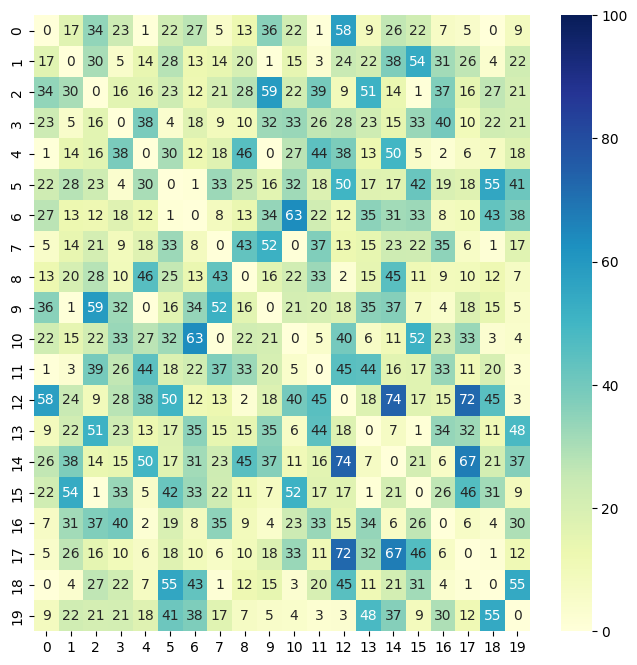

In [192]:
import seaborn as sns

corr_matrix = np.corrcoef(r[0].T)
plt.figure(figsize=(8,8))

sns.heatmap(np.abs(corr_matrix)*100,
            vmin=0, vmax=100, cmap="YlGnBu",
            annot=True,
            fmt=".0f"
            )

<AxesSubplot: >

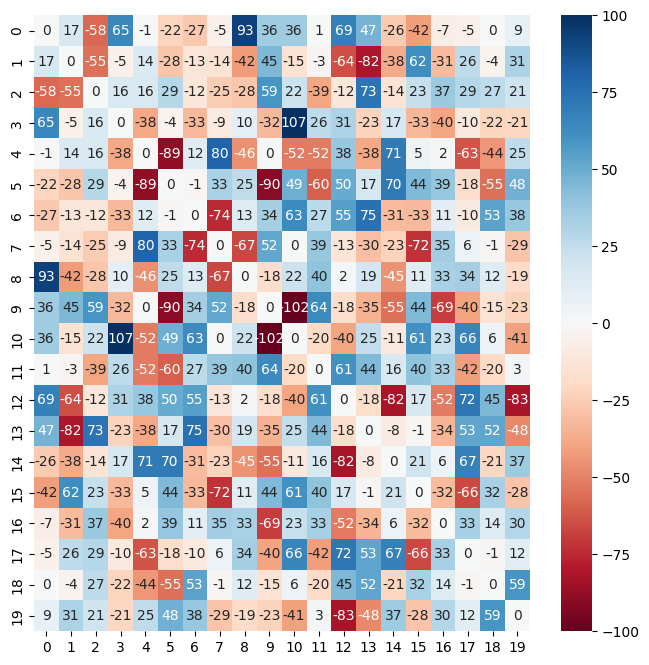

In [193]:
import seaborn as sns

corr_matrix = np.corrcoef(r[0].T) - np.corrcoef(r[2].T)
plt.figure(figsize=(8,8))

sns.heatmap(corr_matrix*100,
            vmin=-100, vmax=100, cmap="RdBu",
            annot=True,
            fmt=".0f"
            )

In [196]:
func_filenames[0]

'/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz'

In [91]:
from nilearn.decomposition import CanICA

canica = CanICA(n_components=20,
                memory="nilearn_cache", memory_level=2,
                verbose=10,
                mask_strategy='whole-brain-template',
                random_state=0)
canica.fit(func_filenames)

# Retrieve the independent components in brain space. Directly
# accessible through attribute `components_img_`.
canica_components_img = canica.components_img_
# components_img is a Nifti Image object, and can be saved to a file with
# the following line:
canica_components_img.to_filename('canica_resting_state.nii.gz')

[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz,
 /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz,
 /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-11/func/sub-01_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz,
 /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-11/func/sub-01_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz,
 /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-02/func/sub-02_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz,
 /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-02/func/sub-02_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz,
 /home/carole/Bureau/BIDS_fMRIprep/

/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8a388304c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


[CanICA] Loading data
[Memory]0.2s, 0.0min    : Loading randomized_svd from nilearn_cache/joblib/sklearn/utils/extmath/randomized_svd/5ffba3d50eb8e24cb8825617ca3a94bf
______________________________________randomized_svd cache loaded - 0.0s, 0.0min


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.2s remaining:    0.0s


[Memory]0.6s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/1928801bffef9e1f1dff7d4a367d22a6
_____________________________________________fastica cache loaded - 0.0s, 0.0min
[Memory]0.6s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/09b5d63f889aee688262ff6bc17a34a5
_____________________________________________fastica cache loaded - 0.0s, 0.0min
[Memory]0.7s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/cac111539fe10e0fda98823a24dc85ee
_____________________________________________fastica cache loaded - 0.0s, 0.0min
[Memory]0.7s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/e3d374010a965bec35af3282a702ad73
_____________________________________________fastica cache loaded - 0.0s, 0.0min
[Memory]0.7s, 0.0min    : Loading fastica from nilearn_cache/joblib/sklearn/decomposition/_fastica/fastica/8464dac4c

[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


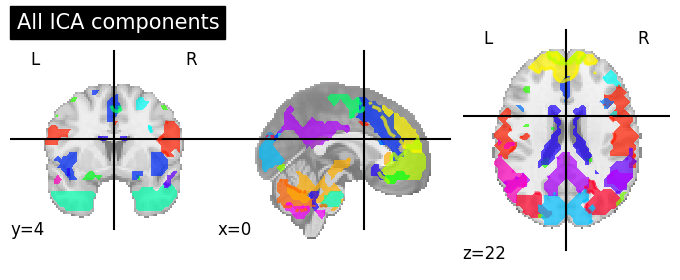

In [92]:
from nilearn.plotting import plot_prob_atlas

# Plot all ICA components together
plot_prob_atlas(canica_components_img, title='All ICA components')

/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


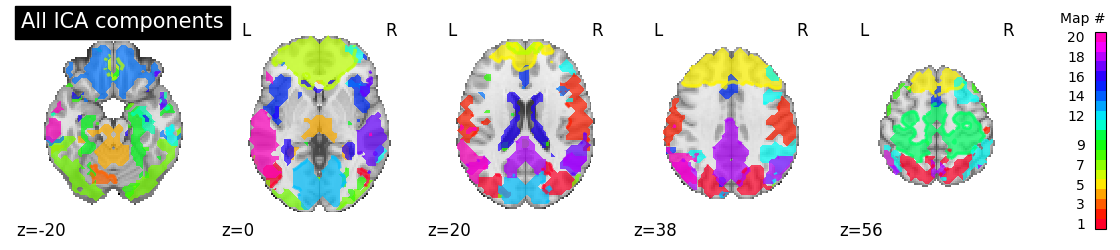

In [57]:
from nilearn.plotting import plot_prob_atlas

# Plot all ICA components together
plot_prob_atlas(canica_components_img, view_type = 'filled_contours',dim=0,display_mode='z',
                         cut_coords=5, colorbar=True, title='All ICA components')

/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/html_document.py:59: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



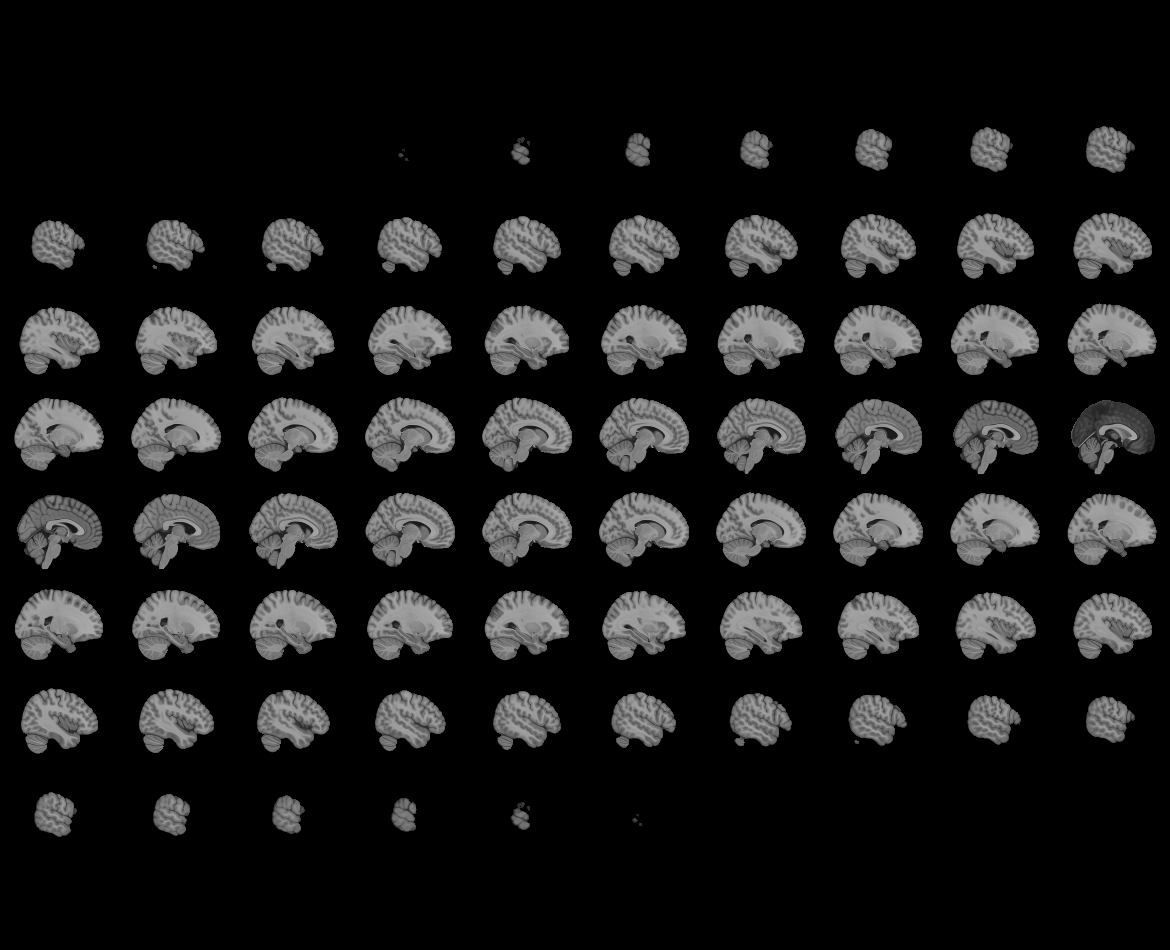
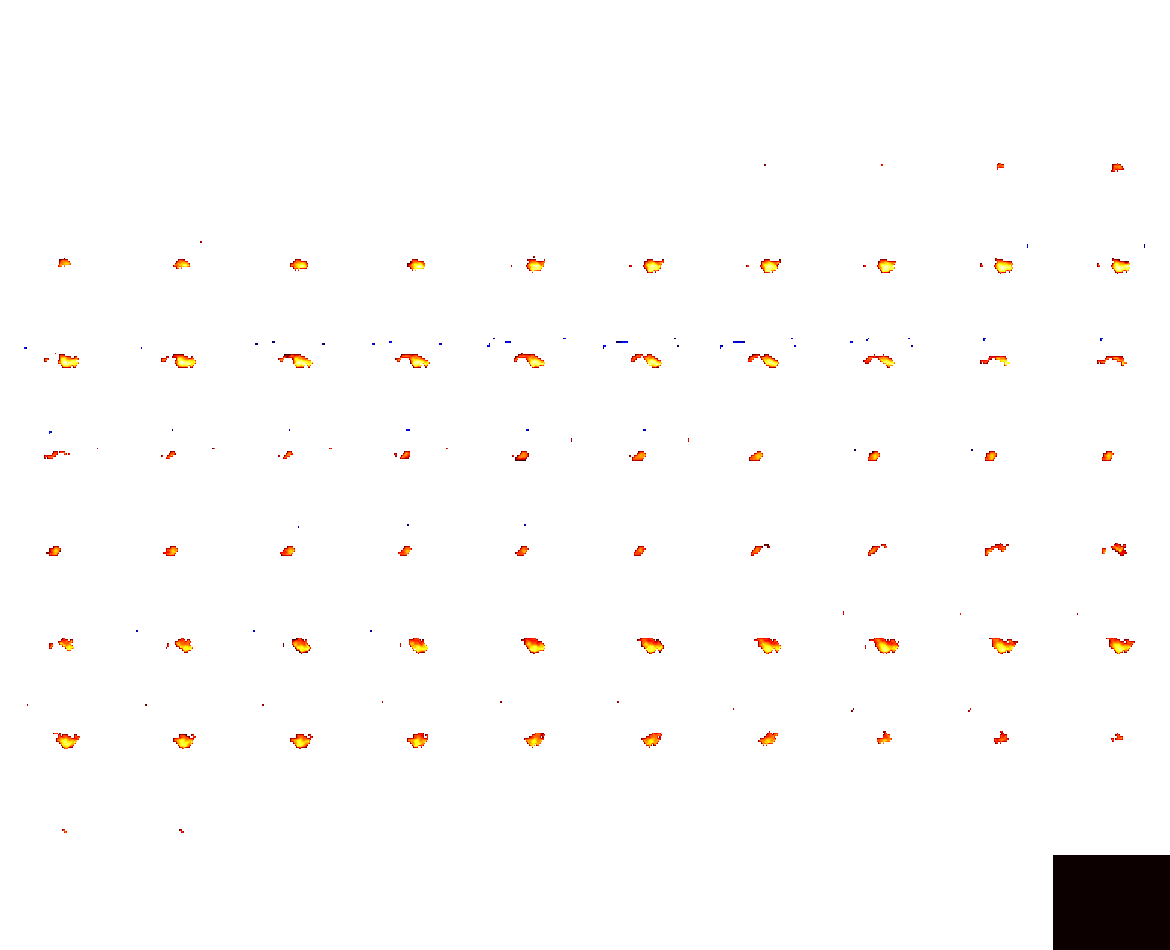

In [76]:
from nilearn import plotting
plotting.view_img(canica_components_img.slicer[:,:,:,10])


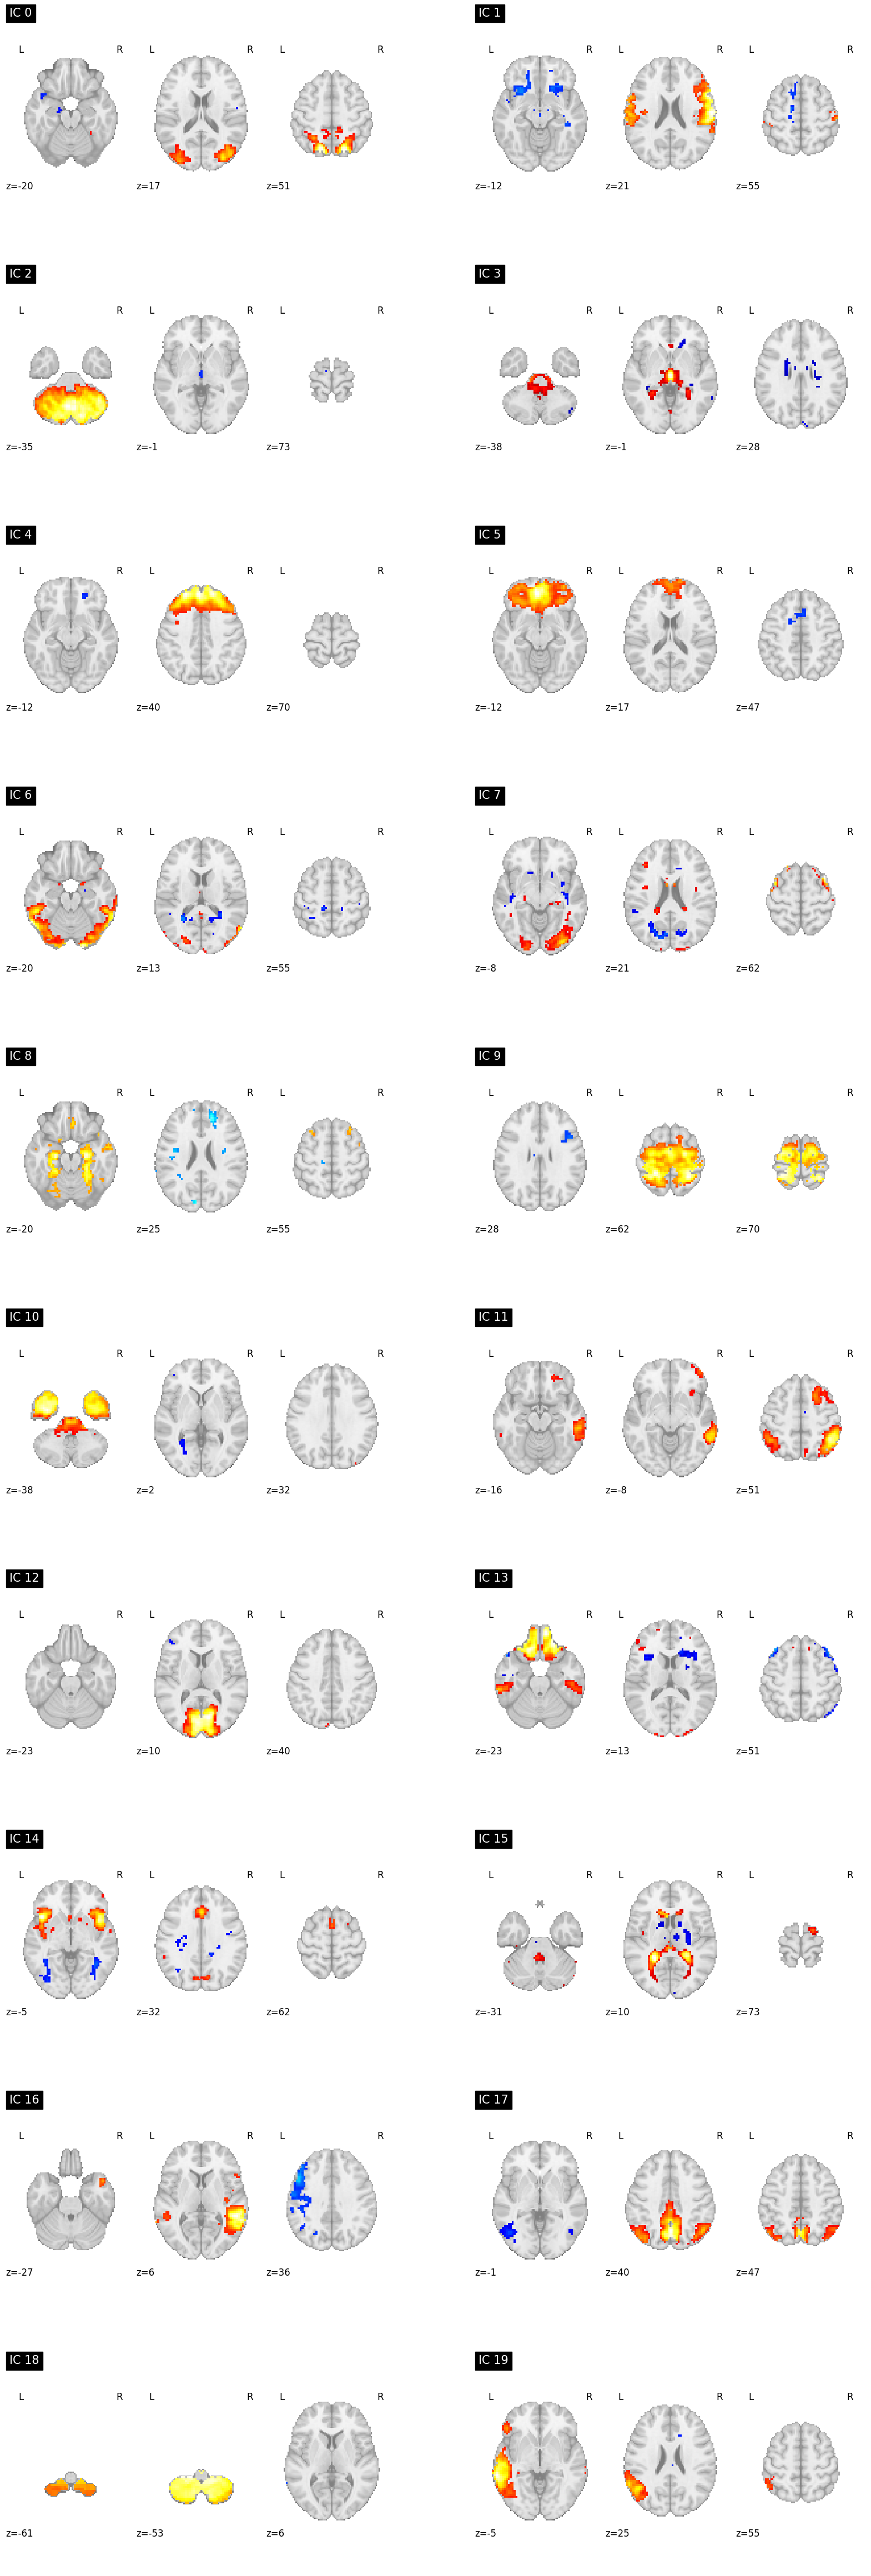

In [75]:
from nilearn.image import iter_img
from nilearn.plotting import plot_stat_map, show
import matplotlib.pyplot as plt

#plt.rcParams['axes.facecolor'] = 'white'
n_columns = 2
n_ica = 20
nrows = int(n_ica / n_columns)
fig, axes = plt.subplots(nrows=nrows, ncols=n_columns, figsize=(20,60))

for i, cur_img in enumerate(iter_img(canica_components_img)):
    plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                  cut_coords=3, 
                  colorbar=False, 
                  axes=axes[int(i / 2), int(i % 2)])

Apply ICA



In [9]:
from sklearn.decomposition import FastICA
n_components = 10
ica = FastICA(n_components=n_components, random_state=42)
components_masked = ica.fit_transform(data_masked.T).T

# Normalize estimated components, for thresholding to make sense
components_masked -= components_masked.mean(axis=0)
components_masked /= components_masked.std(axis=0)
# Threshold
import numpy as np
components_masked[np.abs(components_masked) < .8] = 0

# Now invert the masking operation, going back to a full 3D
# representation
component_img = masker.inverse_transform(components_masked)

/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


Visualize the results



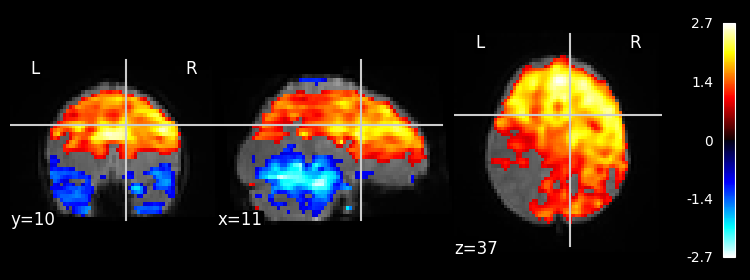

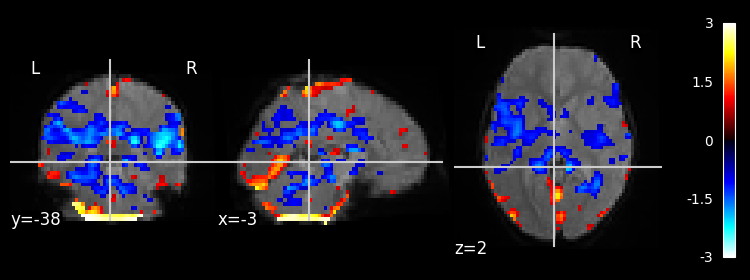

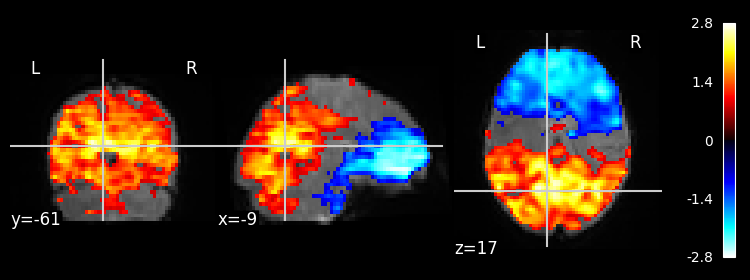

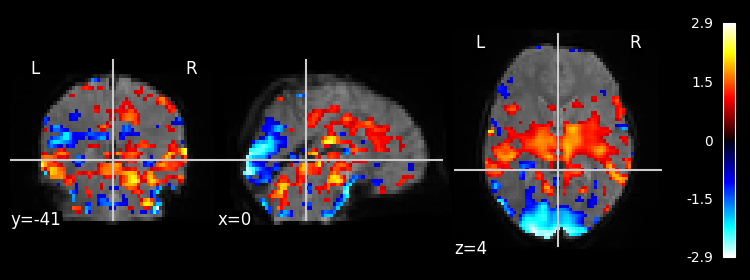

In [198]:
# Show some interesting components
from nilearn import image
from nilearn.plotting import plot_stat_map, show

# Use the mean as a background
mean_img = image.mean_img(func_filename)

plot_stat_map(image.index_img(component_img, 0), mean_img)

plot_stat_map(image.index_img(component_img, 1), mean_img)

plot_stat_map(image.index_img(component_img, 2), mean_img)

plot_stat_map(image.index_img(component_img, 3), mean_img)

show()

In [266]:
for subject in layout.get_subjects():
    if subject not in ['07']:
        for session in layout.get_sessions(subject=subject):
            f = layout.get(task='rest', subject=subject, session=session,
                           space='MNIPediatricAsym', desc='preproc', extension='nii.gz', 
                           return_type='filename')

            print(subject, session, f)

            canica = CanICA(n_components=20,
                            memory="nilearn_cache", memory_level=2,
                            verbose=1,
                            mask_strategy='whole-brain-template',
                            smoothing_fwhm=10,
                            random_state=0)
            canica.fit(f)


            if not os.path.isdir('ICA'):
                os.mkdir('ICA')
            if not os.path.isdir('ICA/individual'): 
                os.mkdir('ICA/individual')
            sub_folder = f'ICA/individual/{subject}'
            if not os.path.isdir(sub_folder): 
                os.mkdir(sub_folder)

            sub_path = os.path.join(sub_folder, f'sub-{subject}_ses-{session}_ica.nii')

            # Retrieve the independent components in brain space. Directly ccessible through attribute `components_img_`.
            canica_components_img = canica.components_img_
            # components_img is a Nifti Image object, and can be saved to a file with he following line:
            canica_components_img.to_filename(sub_path)
            
            sub_path_fig1 = os.path.join(sub_folder, f'sub-{subject}_ses-{session}_fig1_ica.png')

            plot_prob_atlas(canica_components_img, output_file=sub_path_fig1)
            
            n_columns = 2
            n_ica = 20
            nrows = int(n_ica / n_columns)
            fig, axes = plt.subplots(nrows=nrows, ncols=n_columns, figsize=(20,60))
            
            sub_path_fig2 = os.path.join(sub_folder, f'sub-{subject}_ses-{session}_fig2_ica.png')

            for i, cur_img in enumerate(iter_img(canica_components_img)):
                plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                              output_file=sub_path_fig2,
                              cut_coords=3, 
                              colorbar=False, 
                              axes=axes[int(i / 2), int(i % 2)])



08 11 ['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-11/func/sub-08_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz', '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-11/func/sub-08_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz']
[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-11/func/sub-08_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz, /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-11/func/sub-08_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-11/func/sub-08_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=209652396)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 14.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=398764591)
__________________________________________________________fastica - 5.6s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=924231285)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 3.6s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=1478610112)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 8.0s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=441365315)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 6.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=1537364731)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 6.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=192771779)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 8.1s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=1491434855)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 4.0s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=1819583497)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 5.1s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=530702035)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 4.0s, 0.1min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


08 02 ['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-02/func/sub-08_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz', '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-02/func/sub-08_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz']
[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-02/func/sub-08_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz, /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-02/func/sub-08_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8a388304c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-02/func/sub-08_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-02/func/sub-08_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
ra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=209652396)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.7s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=398764591)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.7s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=924231285)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 17.9s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=1478610112)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 14.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=441365315)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 14.8s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=1537364731)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.9s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=192771779)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.0s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=1491434855)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.6s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=1819583497)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.7s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=530702035)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.7min finished


_________________________________________________________fastica - 16.3s, 0.3min


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


01 11 ['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-11/func/sub-01_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz', '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-11/func/sub-01_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz']
[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-11/func/sub-01_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz, /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-11/func/sub-01_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8a388304c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-11/func/sub-01_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-11/func/sub-01_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
ra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=209652396)
__________________________________________________________fastica - 3.1s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=398764591)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 3.1s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=924231285)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 3.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=1478610112)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.5s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=441365315)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.0s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=1537364731)
__________________________________________________________fastica - 6.1s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=192771779)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 3.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=1491434855)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 2.9s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=1819583497)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 3.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=530702035)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 2.2s, 0.0min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   59.7s finished
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


01 02 ['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz', '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz']
[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz, /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8a388304c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
ra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=209652396)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.5s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=398764591)
_________________________________________________________fastica - 15.2s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=924231285)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 11.6s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=1478610112)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.8s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=441365315)
__________________________________________________________fastica - 8.2s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=1537364731)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.5s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=192771779)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.9s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=1491434855)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.1s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=1819583497)
_________________________________________________________fastica - 13.2s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=530702035)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.4min finished


_________________________________________________________fastica - 14.7s, 0.2min


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


05 11 ['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-11/func/sub-05_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz', '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-11/func/sub-05_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz']
[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-11/func/sub-05_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz, /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-11/func/sub-05_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8a388304c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-11/func/sub-05_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-11/func/sub-05_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
ra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=209652396)
__________________________________________________________fastica - 2.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=398764591)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 7.7s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=924231285)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 4.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=1478610112)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 2.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=441365315)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 4.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=1537364731)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 7.0s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=192771779)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 2.8s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=1491434855)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 6.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=1819583497)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 4.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=530702035)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 3.1s, 0.1min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   45.4s finished
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


05 02 ['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-02/func/sub-05_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz', '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-02/func/sub-05_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz']
[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-02/func/sub-05_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz, /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-02/func/sub-05_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8a388304c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-02/func/sub-05_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-02/func/sub-05_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
ra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=209652396)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.1s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=398764591)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.2s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=924231285)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.2s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=1478610112)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.0s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=441365315)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.3s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=1537364731)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.1s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=192771779)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.6s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=1491434855)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.2s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=1819583497)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.1s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=530702035)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.6min finished


_________________________________________________________fastica - 14.7s, 0.2min


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


02 11 ['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-11/func/sub-02_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz', '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-11/func/sub-02_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz']
[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-11/func/sub-02_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz, /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-11/func/sub-02_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8a388304c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-11/func/sub-02_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-11/func/sub-02_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
ra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=209652396)
__________________________________________________________fastica - 4.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=398764591)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 2.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=924231285)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 2.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=1478610112)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 3.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=441365315)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 2.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=1537364731)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 5.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=192771779)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 3.9s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=1491434855)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 2.9s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=1819583497)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 1.9s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=530702035)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 1.6s, 0.0min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   29.6s finished
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),


02 02 ['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-02/func/sub-02_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz', '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-02/func/sub-02_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz']
[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-02/func/sub-02_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz, /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-02/func/sub-02_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8a388304c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-02/func/sub-02_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-02/func/sub-02_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
ra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=209652396)
__________________________________________________________fastica - 6.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=398764591)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 10.3s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=924231285)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.1s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=1478610112)
_________________________________________________________fastica - 14.1s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=441365315)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 5.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=1537364731)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 12.0s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=192771779)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 7.7s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=1491434855)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 11.0s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=1819583497)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.9s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=530702035)
_________________________________________________________fastica - 10.8s, 0.2min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.8min finished
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


In [266]:
for subject in layout.get_subjects():
    if subject not in ['07']:
        for session in layout.get_sessions(subject=subject):
            f = layout.get(task='rest', subject=['07'], session=session,
                           space='MNIPediatricAsym', desc='preproc', extension='nii.gz', 
                           return_type='filename')

            print(subject, session, f)

            canica = CanICA(n_components=20,
                            memory="nilearn_cache", memory_level=2,
                            verbose=1,
                            mask_strategy='whole-brain-template',
                            smoothing_fwhm=10,
                            random_state=0)
            canica.fit(f)


            if not os.path.isdir('ICA'):
                os.mkdir('ICA')
            if not os.path.isdir('ICA/individual'): 
                os.mkdir('ICA/individual')
            sub_folder = f'ICA/individual/{subject}'
            if not os.path.isdir(sub_folder): 
                os.mkdir(sub_folder)

            sub_path = os.path.join(sub_folder, f'sub-{subject}_ses-{session}_ica.nii')

            # Retrieve the independent components in brain space. Directly ccessible through attribute `components_img_`.
            canica_components_img = canica.components_img_
            # components_img is a Nifti Image object, and can be saved to a file with he following line:
            canica_components_img.to_filename(sub_path)
            
            sub_path_fig1 = os.path.join(sub_folder, f'sub-{subject}_ses-{session}_fig1_ica.png')

            plot_prob_atlas(canica_components_img, output_file=sub_path_fig1)
            
            n_columns = 2
            n_ica = 20
            nrows = int(n_ica / n_columns)
            fig, axes = plt.subplots(nrows=nrows, ncols=n_columns, figsize=(20,60))
            
            sub_path_fig2 = os.path.join(sub_folder, f'sub-{subject}_ses-{session}_fig2_ica.png')

            for i, cur_img in enumerate(iter_img(canica_components_img)):
                plot_stat_map(cur_img, display_mode="z", title="IC %d" % i,
                              output_file=sub_path_fig2,
                              cut_coords=3, 
                              colorbar=False, 
                              axes=axes[int(i / 2), int(i % 2)])



08 11 ['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-11/func/sub-08_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz', '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-11/func/sub-08_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz']
[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-11/func/sub-08_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz, /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-11/func/sub-08_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-11/func/sub-08_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=209652396)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 14.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=398764591)
__________________________________________________________fastica - 5.6s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=924231285)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 3.6s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=1478610112)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 8.0s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=441365315)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 6.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=1537364731)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 6.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=192771779)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 8.1s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=1491434855)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 4.0s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=1819583497)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 5.1s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.00523 , ...,  0.003268],
       ...,
       [ 0.003121, ..., -0.00423 ]]), whiten=True, fun='cube', random_state=530702035)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 4.0s, 0.1min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.1min finished
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


08 02 ['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-02/func/sub-08_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz', '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-02/func/sub-08_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz']
[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-02/func/sub-08_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz, /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-02/func/sub-08_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8a388304c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-02/func/sub-08_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-08/ses-02/func/sub-08_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
ra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=209652396)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.7s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=398764591)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.7s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=924231285)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 17.9s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=1478610112)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 14.7s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=441365315)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 14.8s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=1537364731)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.9s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=192771779)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.0s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=1491434855)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.6s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=1819583497)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.7s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003972, ..., 0.004533],
       ...,
       [0.003614, ..., 0.001064]]), whiten=True, fun='cube', random_state=530702035)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.7min finished


_________________________________________________________fastica - 16.3s, 0.3min


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


01 11 ['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-11/func/sub-01_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz', '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-11/func/sub-01_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz']
[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-11/func/sub-01_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz, /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-11/func/sub-01_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8a388304c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-11/func/sub-01_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-11/func/sub-01_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
ra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=209652396)
__________________________________________________________fastica - 3.1s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=398764591)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 3.1s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=924231285)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 3.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=1478610112)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.5s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=441365315)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.0s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=1537364731)
__________________________________________________________fastica - 6.1s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=192771779)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 3.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=1491434855)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 2.9s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=1819583497)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 3.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 3.448073e-03, ...,  4.573969e-05],
       ...,
       [ 3.918048e-03, ..., -4.446530e-03]]), whiten=True, fun='cube', random_state=530702035)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 2.2s, 0.0min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   59.7s finished
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


01 02 ['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz', '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz']
[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz, /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8a388304c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-01/ses-02/func/sub-01_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
ra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=209652396)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.5s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=398764591)
_________________________________________________________fastica - 15.2s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=924231285)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 11.6s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=1478610112)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.8s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=441365315)
__________________________________________________________fastica - 8.2s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=1537364731)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.5s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=192771779)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.9s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=1491434855)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.1s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=1819583497)
_________________________________________________________fastica - 13.2s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.003605, ..., 0.014483],
       ...,
       [0.003729, ..., 0.016444]]), whiten=True, fun='cube', random_state=530702035)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.4min finished


_________________________________________________________fastica - 14.7s, 0.2min


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


05 11 ['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-11/func/sub-05_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz', '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-11/func/sub-05_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz']
[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-11/func/sub-05_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz, /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-11/func/sub-05_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8a388304c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-11/func/sub-05_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-11/func/sub-05_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
ra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=209652396)
__________________________________________________________fastica - 2.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=398764591)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 7.7s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=924231285)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 4.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=1478610112)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 2.4s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=441365315)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 4.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=1537364731)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 7.0s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=192771779)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 2.8s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=1491434855)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 6.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=1819583497)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 4.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004866, ..., -0.00511 ],
       ...,
       [ 0.004722, ..., -0.001188]]), whiten=True, fun='cube', random_state=530702035)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 3.1s, 0.1min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   45.4s finished
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),


05 02 ['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-02/func/sub-05_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz', '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-02/func/sub-05_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz']
[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-02/func/sub-05_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz, /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-02/func/sub-05_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8a388304c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-02/func/sub-05_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-05/ses-02/func/sub-05_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
ra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=209652396)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.1s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=398764591)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.2s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=924231285)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.2s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=1478610112)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.0s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=441365315)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.3s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=1537364731)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.1s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=192771779)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.6s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=1491434855)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 16.2s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=1819583497)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.1s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[0.007978, ..., 0.003616],
       ...,
       [0.003012, ..., 0.003194]]), whiten=True, fun='cube', random_state=530702035)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  2.6min finished


_________________________________________________________fastica - 14.7s, 0.2min


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


02 11 ['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-11/func/sub-02_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz', '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-11/func/sub-02_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz']
[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-11/func/sub-02_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz, /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-11/func/sub-02_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8a388304c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-11/func/sub-02_ses-11_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-11/func/sub-02_ses-11_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
ra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=209652396)
__________________________________________________________fastica - 4.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=398764591)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 2.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=924231285)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 2.1s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=1478610112)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 3.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=441365315)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 2.0s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=1537364731)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 5.3s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=192771779)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 3.9s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=1491434855)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 2.9s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=1819583497)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 1.9s, 0.0min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.005594, ...,  0.006522],
       ...,
       [ 0.00531 , ..., -0.000179]]), whiten=True, fun='cube', random_state=530702035)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 1.6s, 0.0min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   29.6s finished
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),


02 02 ['/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-02/func/sub-02_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz', '/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-02/func/sub-02_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz']
[MultiNiftiMasker.fit] Loading data from [/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-02/func/sub-02_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz, /home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-02/func/sub-02_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz].
[{self.__class__.__name__}.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/joblib/memory.py:632: UserWarning: Cannot inspect object functools.partial(<function compute_multi_brain_mask at 0x7f8a388304c0>, mask_type='whole-brain'), ignore list will not work.
  return hashing.hash(filter_args(self.func, self.ignore, args, kwargs),


[CanICA] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-02/func/sub-02_ses-02_task-rest_run-1_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/carole/Bureau/BIDS_fMRIprep/derivatives/sub-02/ses-02/func/sub-02_ses-02_task-rest_run-2_space-MNIPediatricAsym_cohort-3_desc-preproc_bold.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals
________________________________________________________________________________
[Memory] Calling sklearn.utils.extmath.randomized_svd...
ra

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=209652396)
__________________________________________________________fastica - 6.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=398764591)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 10.3s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=924231285)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.1s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=1478610112)
_________________________________________________________fastica - 14.1s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=441365315)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 5.5s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=1537364731)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 12.0s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=192771779)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


__________________________________________________________fastica - 7.7s, 0.1min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=1491434855)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 11.0s, 0.2min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=1819583497)


/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/sklearn/decomposition/_fastica.py:305: FutureWarning: Starting in v1.3, whiten=True should be specified as whiten='arbitrary-variance' (its current behaviour). This behavior is deprecated in 1.1 and will raise ValueError in 1.3.
  S = est._fit(X, compute_sources=compute_sources)


_________________________________________________________fastica - 15.9s, 0.3min
________________________________________________________________________________
[Memory] Calling sklearn.decomposition._fastica.fastica...
fastica(array([[ 0.004268, ..., -0.001087],
       ...,
       [ 0.003513, ...,  0.003558]]), whiten=True, fun='cube', random_state=530702035)
_________________________________________________________fastica - 10.8s, 0.2min


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:  1.8min finished
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: No contour levels were found within the data range.
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/nilearn/plotting/displays/_axes.py:71: UserWarning: linewidths is ignored by contourf
  im = getattr(ax, type)(data_2d.copy(),
/home/carole/miniconda3/envs/nilearn/lib/python3.8/site-packages/numpy/ma/core.py:2826: UserWarning: Warning: converting a masked element to nan.
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:

wiw='/home/carole/Bureau/nilearn/ICA/individual/08/sub-08_ses-11_ica.nii'
plot_prob_atlas(wiw)